In [1]:
import pandas as pd
import numpy as np
import scipy as sp
# from math import radians, cos, sin, asin, sqrt
from matplotlib import pyplot as plt
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (11, 8)
import seaborn as sns

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

Populating the interactive namespace from numpy and matplotlib


<h3> Data Dictionary :</h3>
<ul>
<li>id - a unique identifier for each trip</li>
<li>vendor_id - a code indicating the provider associated with the trip record</li>
<li>pickup_datetime - date and time when the meter was engaged</li>
<li>dropoff_datetime - date and time when the meter was disengaged</li>
<li>passenger_count - the number of passengers in the vehicle (driver entered value)</li>
<li>pickup_longitude - the longitude where the meter was engaged</li>
<li>pickup_latitude - the latitude where the meter was engaged</li>
<li>dropoff_longitude - the longitude where the meter was disengaged</li>
<li>dropoff_latitude - the latitude where the meter was disengaged</li>
<li>store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip</li>
<li>trip_duration - duration of the trip in seconds</li>
</ul>

In [2]:
url="/media/rama/ANYTHING/DataSets/train.csv"
nyc=pd.read_csv(url,index_col=0)
nyc.head(5)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
id,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [6]:
nyc['pickup_datetime']=pd.to_datetime(nyc['pickup_datetime'])
# nyc['pickup_datetime'].dt.date

In [3]:
# Check missing data
nyc.isnull().sum()

vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [4]:
# Data Info
nyc.dtypes
nyc.info()
nyc.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1458644 entries, id2875421 to id1209952
Data columns (total 10 columns):
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(3)
memory usage: 122.4+ MB


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [7]:
# ('2011-01-03','%Y')

nyc['tmp_pickuptime']=pd.to_numeric(nyc['pickup_datetime'].dt.strftime('%w'))
# nyc['tmp_pickuptime']=pd.to_numeric(nyc['tmp_pickuptime'])
def to_day(dy):
    if dy == 0:
        return 'Sunday'
    elif dy == 1:
        return 'Monday'
    elif dy == 2:
        return 'Tuesday'
    elif dy == 3:
        return 'Wednesday'
    elif dy == 4:
        return 'Thursday'
    elif dy == 5:
        return 'Friday'
    elif dy == 6:
        return 'Saturday'
    else:
        return 'no format'

# to_day()
nyc['pickup_day']=nyc['tmp_pickuptime'].apply(to_day)

In [9]:
nyc['tmp_pickuphour']=pd.to_numeric(nyc['pickup_datetime'].dt.strftime('%H'))

def rush_hour(hy):
    if hy == 7 or hy == 9:
        return 'Morning'
    elif hy == 17 or hy == 19:
        return 'Evening'
    else:
        return 'no label'

nyc['pickup_hour']=nyc['tmp_pickuphour'].apply(rush_hour)
# nyc.dtypes

In [10]:
# Amount of trips by vendor
trips=nyc.groupby('vendor_id').count()['pickup_datetime']
trips

vendor_id
1    678342
2    780302
Name: pickup_datetime, dtype: int64

In [12]:
# Amount of trips per day
trips_day=nyc.groupby(nyc['pickup_datetime'].dt.date).count()['vendor_id']
trips_day.head(10)

pickup_datetime
2016-01-01    7162
2016-01-02    6512
2016-01-03    6353
2016-01-04    6725
2016-01-05    7204
2016-01-06    7365
2016-01-07    7649
2016-01-08    8229
2016-01-09    8578
2016-01-10    7454
Name: vendor_id, dtype: int64

In [14]:
# Amount of passengger per datetime
passenger=nyc.groupby(nyc['pickup_datetime'].dt.date).sum()['passenger_count']
passenger.head(10)

pickup_datetime
2016-01-01    12877
2016-01-02    11671
2016-01-03    11041
2016-01-04    11069
2016-01-05    11837
2016-01-06    12181
2016-01-07    12587
2016-01-08    13555
2016-01-09    14880
2016-01-10    12664
Name: passenger_count, dtype: int64

In [15]:
# Trip duration by vendor
duration_trip_v=nyc.groupby('vendor_id').sum()['trip_duration']
duration_trip_v

vendor_id
1    573496269
2    826061378
Name: trip_duration, dtype: int64

In [16]:
# Trip duration/amount per day
duration_trip = nyc.groupby(nyc['pickup_day']).count()['trip_duration']
duration_trip.sort_values(ascending=False)

pickup_day
Friday       223533
Saturday     220868
Thursday     218574
Wednesday    210136
Tuesday      202749
Sunday       195366
Monday       187418
Name: trip_duration, dtype: int64

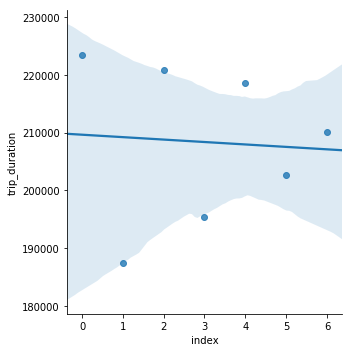

In [44]:
nyc.head(5)
duration_trip=pd.DataFrame(duration_trip)
# x and y must same data type
sns.lmplot(x='index',y='trip_duration',data=duration_trip)
# nyc.dtypes

In [9]:
# Trip amount per rush hours(7to9 and 17to19)
trips_rush_hour=nyc.groupby(['pickup_day','pickup_hour']).count()['trip_duration']
trips_rush_hour

pickup_day  pickup_hour
Friday      Evening         25203
            Morning         20160
            no label       178170
Monday      Evening         23091
            Morning         18627
            no label       145700
Saturday    Evening         24319
            Morning         11606
            no label       184943
Sunday      Evening         20741
            Morning          9201
            no label       165424
Thursday    Evening         24750
            Morning         21327
            no label       172497
Tuesday     Evening         24130
            Morning         21005
            no label       157614
Wednesday   Evening         24557
            Morning         21337
            no label       164242
Name: trip_duration, dtype: int64

In [9]:
nyc.head(10)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,tmp_pickuptime,pickup_day,tmp_pickuphour,pickup_hour
id,,,,,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1,Monday,17,Evening
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0,Sunday,0,no label
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2,Tuesday,11,no label
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,3,Wednesday,19,Evening
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6,Saturday,13,no label
id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443,6,Saturday,22,no label
id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341,5,Friday,22,no label
id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551,6,Saturday,7,Morning
id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255,5,Friday,23,no label


In [ ]:
#TODO 
# Hitung Jarak
# Test pakai linear regression

In [10]:
def haversine(lat1, lon1, lat2, lon2):
    MILES = 3959
    lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1 
    dlon = lon2 - lon1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    total_miles = MILES * c
    return total_miles

In [11]:
# nyc['Distance']=nyc['longlat'].apply(haversine)

# nyc['Distance'][0][1]

nyc['distance']=nyc.apply(lambda col: haversine(col['pickup_latitude'], col['pickup_longitude'], 
                                                col['dropoff_latitude'], col['dropoff_longitude']),axis=1)

In [12]:
nyc.head(10)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,tmp_pickuptime,pickup_day,tmp_pickuphour,pickup_hour,distance
id,,,,,,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1,Monday,17,Evening,0.931195
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0,Sunday,0,no label,1.121959
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2,Tuesday,11,no label,3.967761
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,3,Wednesday,19,Evening,0.923103
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6,Saturday,13,no label,0.738600
id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443,6,Saturday,22,no label,0.682893
id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341,5,Friday,22,no label,0.824162
id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551,6,Saturday,7,Morning,3.551343
id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255,5,Friday,23,no label,0.814266


In [15]:
#TODO: Build model using Linear Regression
nyc_train=nyc[['distance','trip_duration']].reset_index()
# nyc_train[['distance','trip_duration']]
# nyc.ix[:10,:]
training = nyc_train[['distance','trip_duration']].ix[:500,:]
testing = nyc_train[['distance','trip_duration']].ix[501:1000,:]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


Coefficients: 
 [[ 198.82265778]]
Mean squared error: 14225559.06
Variance score: 0.01


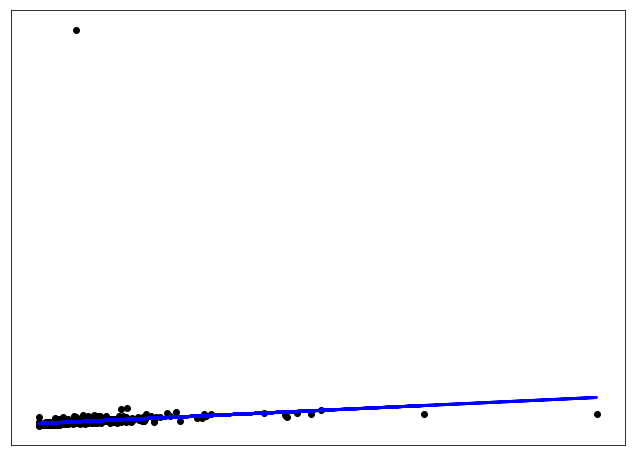

In [16]:
## Training/Testing sets
train_x= np.asarray(training['distance']).reshape(-1,1)
test_x=np.asarray(testing['distance']).reshape(-1,1)
## The target training/testing sets
train_y=np.asarray(training['trip_duration']).reshape(-1,1)
test_y=np.asarray(testing['trip_duration']).reshape(-1,1)

## Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(train_x,train_y)

# Make prediction using the testing set
test_y_predict = regr.predict(test_x)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(test_y, test_y_predict))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(test_y, test_y_predict))
# print(test_y,test_y_predict)

index = ['Row'+str(i) for i in range(1, len(test_y)+1)]
# index


# Plot outputs
plt.scatter(test_x, test_y,  color='black')
plt.plot(test_x, test_y_predict, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()



In [18]:
compare = pd.DataFrame({'test': test_y.tolist(),'prediction': test_y_predict.tolist()},index=index)
compare.head(10)

,prediction,test
Row1,[701.7272605913101],[620]
Row2,[807.2887323540378],[803]
Row3,[481.6778914471058],[166]
Row4,[721.835782501146],[401]
Row5,[443.51365095471476],[67]
Row6,[899.0237893815747],[1173]
Row7,[542.6159661278396],[695]
Row8,[529.5022556847437],[286]
Row9,[552.0887317192917],[493]
Row10,[1148.1313114564057],[669]


In [17]:
# TODO
# Calculation to get correlation among data
sp.stats.pearsonr(train_x,train_y)


(array([ 0.72965852]), array([  2.09952859e-84]))

In [14]:
# train_psg= np.asarray(nyc['passenger_count']).ix[:500,:].reshape(-1,1)

In [ ]:
# TODO: Visualization